<a href="https://colab.research.google.com/github/click-b8/Micro-Fluidics-2024/blob/main/Noah%20Brande%20Calculation%20of%20Flow%20in%20a%20Rectangular%20Channel%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Micro-Fluidics code for Calculating flow through a rectangular channel

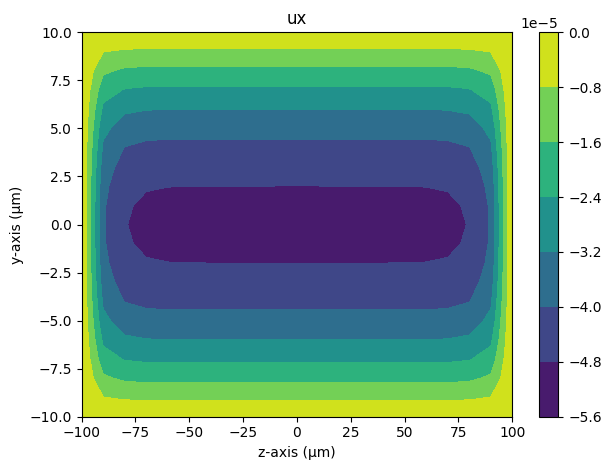

Q = 1.2553167095059825e-13


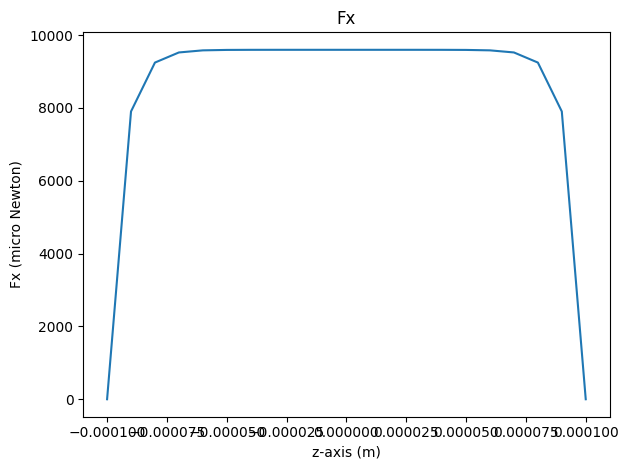

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
eta = 1e-3
w = 1e-4
h = 1e-5
P = 10
L = 10e-3
dpdx = P / L

# Calculate ux
A = -16 * h**2 / eta / np.pi**3 * dpdx
z = np.linspace(-w, w, 21)
y = np.linspace(-h, h, 21)
zz, yy = np.meshgrid(z, y)

term = np.zeros_like(zz)
for n in range(1, 12, 2):
    B = 1 - np.cosh(n * np.pi * zz / (2 * h)) / np.cosh(n * np.pi * w / (2 * h))
    C = np.cos(n * np.pi * yy / (2 * h)) / n**3
    term += (-1)**((n - 1) // 2) * B * C

ux = A * term

# Visualize ux
plt.figure()
plt.contourf(zz*1e6, yy*1e6, ux, cmap='viridis')
plt.colorbar()
plt.xlabel('z-axis (μm)')
plt.ylabel('y-axis (μm)')
plt.title('ux')
plt.tight_layout()
plt.show()

# Calculate Q
D = [np.tanh(m * np.pi * w / (2 * h)) / m**5 for m in range(1, 10, 2)]
Q = 4 / 3 / eta * w * h**3 * dpdx * (1 - 192 / np.pi**5 * h / w) * sum(D)
print("Q =", Q)

# Calculate Fx
E = np.zeros_like(z)
for m in range(1, 10, 2):
    E += (1 - np.cosh(m * np.pi * z / (2 * h)) / np.cosh(m * np.pi * w / (2 * h))) / m**2

Fx = 8 * h / np.pi**2 * dpdx * E * 1e6

# Plot Fx
plt.figure()
plt.plot(z, Fx)
plt.xlabel('z-axis (m)')
plt.ylabel('Fx (micro Newton)')
plt.title('Fx')
plt.tight_layout()
plt.show()
